# K-Nearest Neighbors using scikit-learn

In this Jupyter notebook, we will implement the KNN algorithm written with Python utilizing the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which can also be accessed through the scikit-learn package.

Contrary to the [Julia](https://github.com/jzhu95/DATA_4319/blob/master/Julia/K_Nearest_Neighbors/KNN.ipynb) KNN algorithm where we wrote every function and tested the data ourselves, we will utilize the package of scikit-learn, or sklearn. There, you will find more on theory and the algorithm steps on the KNN.

We will also implement the following packages: 
* scikit-learn [documentation](https://github.com/scikit-learn/scikit-learn)
* numpy [documentation](https://github.com/numpy/numpy)
* pandas [documentation](https://pandas.pydata.org/docs/user_guide/index.html)
* matplotlib [documentation](https://matplotlib.org/)

### Load Preliminaries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

### Load Dataset

There can be a couple of methods to work from the iris dataset, here I will import the dataset from sklearn and convert it into a pandas dataset.

In [23]:
# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# preview if converting from sklearn to pandas dataset was done correctly
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Preprocessing and Splitting Data

We can then proceed to then split our dataset into its attributes and labels. The X variable contains the first four columns of the dataset (attributes) while y contains the labels (targets: 0 = setosa, 1 = versicolor, 2 = virginica).

To avoid over-fitting, we can divide our dataset into training and testing datasets, this can give us a better idea as to how our algorithm performed during the testing phase. Furthermore, this way our algorithm is tested on un-seen data, as it would be in a production application, comparing to realistic usage of our algorithm.

We will be using a split of 70-30 ratio, meaning that 70% of our dataset will be used for training and the rest will go towards testing.

In [25]:
# split dataset into attributes and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [27]:
# using 70% of our data as train data and 30% of data as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Data preprocessing is an extremely important step in machine learning or deep learning. We cannot just dump the raw data into a model and expect it to perform well. Even if we build a complex, well structured model, its performance gets as good as the data we feed to it. If we use them without any scaling, machine learning models might give more importance to the features with higher values. Models tend to perform better and converge faster when the features are on a relatively similar scale. Thus, we need to process the raw data to boost the performance of models.

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### How to Properly Choose a K-value

K-value indicates the count of the nearest neighbors. We have to compute distances between test points and trained labels points. Updating distance metrics with every iteration is computationally expensive, and that’s why KNN is a lazy learning algorithm.

There are no pre-defined statistical methods to find the most favorable value of K. We must initialize a random K value and start computing. Therefore, we can plot error rate vs. K value denoting values in a defined range, then pick the k-value which has the least error rate, being k = 1, 6, 7, 8, 16 in our example; we can use any of these values in our prediction model.

Minimum error: 0.06666666666666667 at K = 1


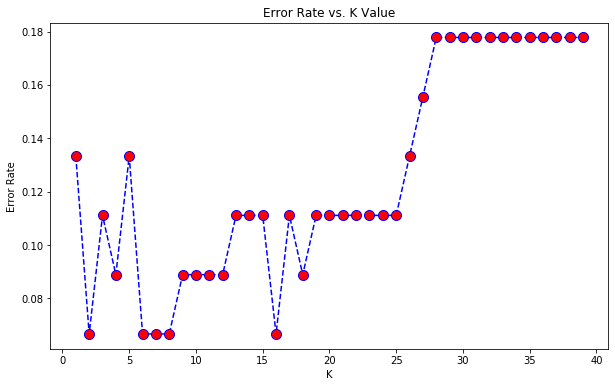

In [32]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:", min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Training and Prediction using Test Data

In [36]:
# training data with k-value = 6
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

# using training data to predict test data
y_pred = classifier.predict(X_test)

### Evaluation of Results

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.88      0.94      0.91        16
         2.0       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



The results show that our KNN algorithm was able to classify 30% of the test set (45 results) with above 90% accuracy, which is excellent. Although the algorithm performed very well with this dataset, we should not expect the same results with all applications, especially in real life applications. As noted in our Julia KNN algorithm, KNN does not always perform as well with high-dimensionality or categorical features.